In [10]:
import numpy as np 
import pandas as pd 

from datetime import datetime

In [24]:
date_to_datetime = lambda row: datetime(row['date'].year,row['date'].month,row['date'].day,row['hour'])

# the hour in the weather datasets looks to be from 1 to 24 rather than 0 to 23
weather_date_to_datetime = lambda row: datetime(row['date'].year,row['date'].month,row['date'].day,row['hour']-1)

### Example of loading in the weather data

here we can load in the weather data from the files to be joined to the dataframes of features that we might have.

In [25]:
weather = []
for loc in ['YVR', 'WYJ']:
    df = pd.read_csv(f'load_data/Weather_{loc}.csv')
    df['location'] = loc 
    weather.append(df.copy())
weather = pd.concat(weather)
weather

,date,hour,temperature,humidity,pressure,weather,location
0,2012-01-01,1,2.4,74.0,102.63,Cloudy,YVR
1,2012-01-01,2,2.8,69.0,102.62,Cloudy,YVR
2,2012-01-01,3,2.8,69.0,102.69,Cloudy,YVR
3,2012-01-01,4,2.6,71.0,102.75,Cloudy,YVR
4,2012-01-01,5,2.8,69.0,102.78,Cloudy,YVR
...,...,...,...,...,...,...,...
43725,2019-12-31,20,11.5,98.0,99.37,NaN,WYJ
43726,2019-12-31,21,11.1,95.0,99.35,NaN,WYJ
43727,2019-12-31,22,10.8,94.0,99.34,NaN,WYJ
43728,2019-12-31,23,10.7,92.0,99.38,NaN,WYJ


### Example of loading different residential datasets

In [51]:
df = pd.read_csv('load_data/Residential_1.csv')
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = df.apply(date_to_datetime, axis=1)
df

,date,hour,energy_kWh,datetime
0,2012-06-01,1,1.011,2012-06-01 01:00:00
1,2012-06-01,2,0.451,2012-06-01 02:00:00
2,2012-06-01,3,0.505,2012-06-01 03:00:00
3,2012-06-01,4,0.441,2012-06-01 04:00:00
4,2012-06-01,5,0.468,2012-06-01 05:00:00
...,...,...,...,...
29226,2015-10-02,20,2.101,2015-10-02 20:00:00
29227,2015-10-02,21,1.646,2015-10-02 21:00:00
29228,2015-10-02,22,1.319,2015-10-02 22:00:00
29229,2015-10-02,23,1.473,2015-10-02 23:00:00


In [52]:
meta = pd.read_csv('load_data/metadata.csv')
meta = meta.loc[meta['HouseID'] == 1]
meta.head()

,HouseID,StartDate,EndDate,Cover,HouseType,Facing,Region,Rentals,FAGF,HP,FPG,FPE,IFRHG,NAC,FAC,PAC,BHE,IFRHE,WRHIR,GEOTH
0,1,2012-06-01,2015-10-03,1.0,bungalow,South,YVR,1.0,1,1,1,0,0,0,0,0,0,0,0,0


In [53]:
weather = pd.read_csv('load_data/Weather_YVR.csv')
weather['date'] = pd.to_datetime(weather['date'])
weather['datetime'] = weather.apply(weather_date_to_datetime, axis=1)
weather.head()

,date,hour,temperature,humidity,pressure,weather,datetime
0,2012-01-01,1,2.4,74.0,102.63,Cloudy,2012-01-01 00:00:00
1,2012-01-01,2,2.8,69.0,102.62,Cloudy,2012-01-01 01:00:00
2,2012-01-01,3,2.8,69.0,102.69,Cloudy,2012-01-01 02:00:00
3,2012-01-01,4,2.6,71.0,102.75,Cloudy,2012-01-01 03:00:00
4,2012-01-01,5,2.8,69.0,102.78,Cloudy,2012-01-01 04:00:00


In [54]:
df.set_index('datetime', inplace=True)
weather.set_index('datetime', inplace=True)
df = df.join(weather[['temperature','humidity','pressure','weather']], how='left')
df.reset_index(drop=False, inplace=True)
df.head()

,datetime,date,hour,energy_kWh,temperature,humidity,pressure,weather
0,2012-06-01 01:00:00,2012-06-01,1,1.011,13.3,84.0,101.39,Rain Showers
1,2012-06-01 02:00:00,2012-06-01,2,0.451,13.0,83.0,101.39,Rain
2,2012-06-01 03:00:00,2012-06-01,3,0.505,12.5,86.0,101.26,Drizzle
3,2012-06-01 04:00:00,2012-06-01,4,0.441,12.7,85.0,101.21,Drizzle
4,2012-06-01 05:00:00,2012-06-01,5,0.468,12.7,85.0,101.12,Drizzle


<Axes: xlabel='temperature', ylabel='energy_kWh'>

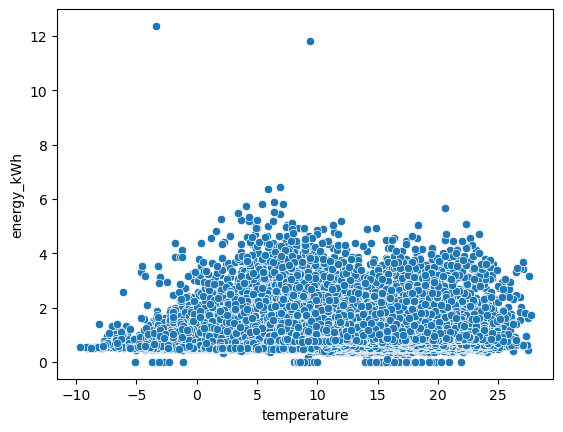

In [55]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.scatterplot(data=df, x='temperature', y='energy_kWh')

<Axes: xlabel='weather', ylabel='energy_kWh'>

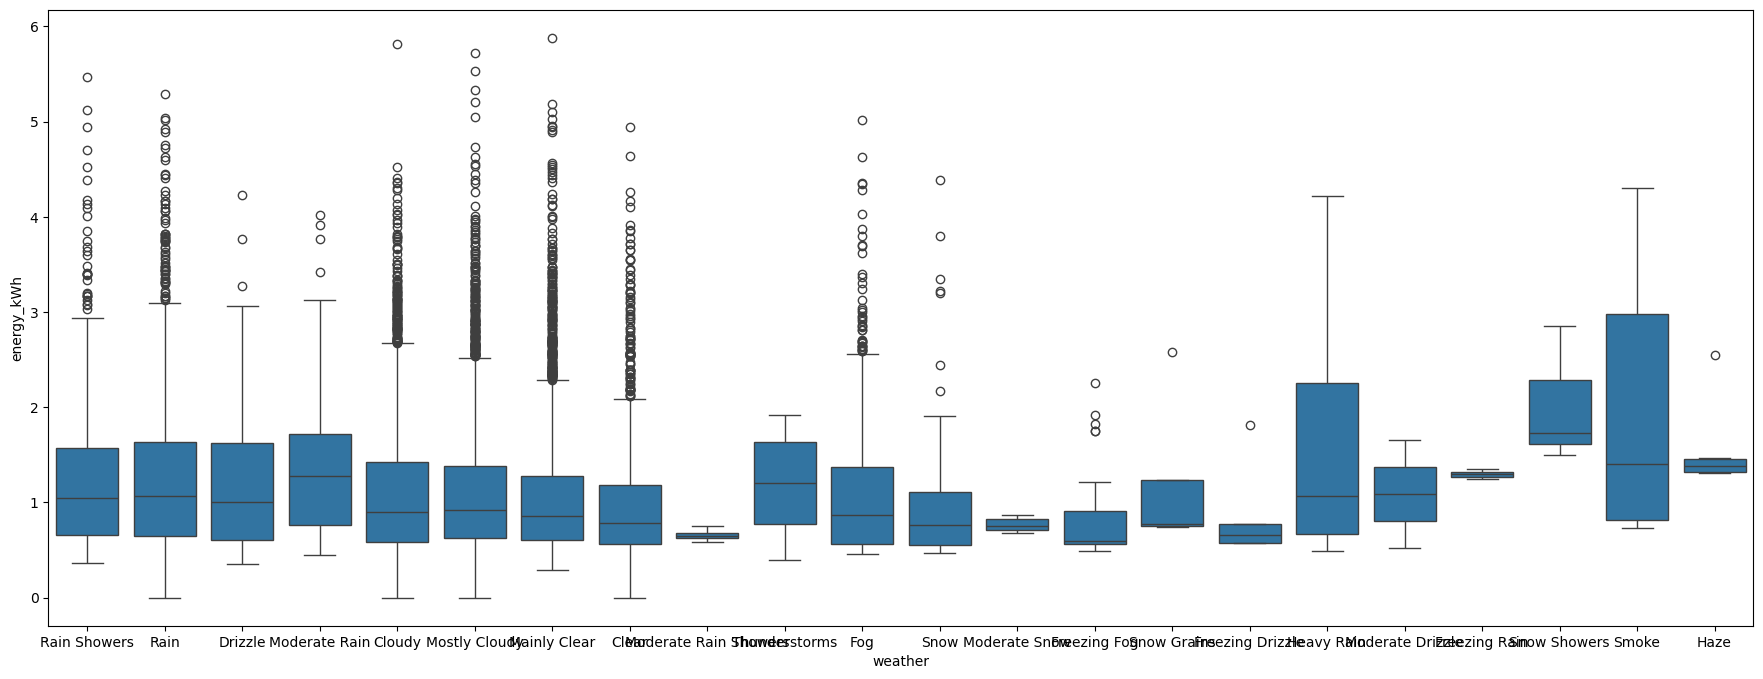

In [69]:
plt.figure(figsize=(22,8))
sns.boxplot(data=df, x='weather', y='energy_kWh')